# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : TALN 

---

# Observations et environnement
---

In [1]:
random_state = 42

In [2]:
cd ../..

/Volumes/Geek/Work/Patat


In [3]:
import importlib
import pandas as pd
import seaborn as sns

In [100]:
pd.set_option('display.precision',2)

## Articles & Labels

In [4]:
import patat.db.label_db
filename = 'data/demo/230226-Label.csv'
label_db = patat.db.label_db.LabelDb(filename)
label_db.df()

,url,label,value,owner,type,url_h
0,https://www.alnas.fr/actualite/communaute/lara...,infox,0.000000,recueil,obs,ef05018ec0f5d637bceb4cef7004e8ee5fe48f6f
1,https://www.alnas.fr/actualite/communaute/lara...,signe,0.000000,recueil,obs,ef05018ec0f5d637bceb4cef7004e8ee5fe48f6f
2,https://www.alnas.fr/actualite/communaute/lara...,entites_nommees,1.000000,recueil,obs,ef05018ec0f5d637bceb4cef7004e8ee5fe48f6f
3,https://www.alnas.fr/actualite/communaute/lara...,entites_coherentes,1.000000,recueil,obs,ef05018ec0f5d637bceb4cef7004e8ee5fe48f6f
4,https://www.alnas.fr/actualite/communaute/lara...,ouverture_esprit,0.000000,recueil,obs,ef05018ec0f5d637bceb4cef7004e8ee5fe48f6f
...,...,...,...,...,...,...
266957,https://www.profession-gendarme.com/zelensky-e...,infox,0.556761,220930-tf_lr.pp,pred,e346761c2a99d892b26c9388480e0ee6ad6b303b
266958,https://www.profession-gendarme.com/zelensky-l...,infox,0.164531,220930-tf_lr.pp,pred,77525354644316eadab53960efa8f5fd028c7f67
266959,https://www.profession-gendarme.com/zelensky-m...,infox,0.673791,220930-tf_lr.pp,pred,fc6a074da5c02032bc9fc3f35f1044bc4029042c
266960,https://www.profession-gendarme.com/zero-mort-...,infox,0.103192,220930-tf_lr.pp,pred,e4f0a8961d79c9a5f66c80d7aa4196cb679af2b0


In [5]:
import patat.db.article_db
filename = 'data/demo/230226-Article.csv'
article_db = patat.db.article_db.ArticleDb(filename)
article_db.df()

/Volumes/Geek/Work/Patat/patat/db/article_db.py:50: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


,url,title,article,author,tag,abstract,site,date_iso,url_h,c_count,predict_infox
0,https://www.alnas.fr/actualite/en-vrac/les-emi...,Les Émirats arabes unis et l’Arabie saoudite f...,Plus des trois quarts des importations japonai...,Par Sarah -,"['Actualités', 'En vrac']",NaN,www.alnas.fr,2023-01-03T00:00:00,d9726057bcbe0182c5bec27f5cc2e1c73594a361,NaN,0.5
1,https://www.anguillesousroche.com/changement-c...,Article d’opinion du NY Times : « S’accoupler ...,« Nous serons plus nombreux à pouvoir monter d...,NaN,['Changement climatique'],NaN,www.anguillesousroche.com,2023-01-04T00:00:00,7dce1f2479231f6e9606c69da67444b634c2d32d,NaN,0.5
2,https://www.bvoltaire.fr/prediction-pour-2023-...,Prédiction pour 2023 : ça va bien se passer… j...,"Le 31 décembre dernier, Emmanuel Macron était,...",Frédéric Lassez,['Articles\nPolitique\nVoeux Macron'],NaN,www.bvoltaire.fr,2023-01-03T00:00:00,b11055abd5b8f6c385a79096ae29d90f8a0348ff,NaN,0.5
3,https://lesdeqodeurs.fr/le-premier-ministre-or...,Le Premier ministre Orbán affirme que le scand...,Article original datant du 16/12/22 par RMX.ne...,NaN,"['Andrea Cozzolino', 'Bruxelles', 'corruption'...",NaN,lesdeqodeurs.fr,2022-12-19T00:00:00,790fa6da6e1d9151e0ad6ce08627f738ad1e864c,NaN,0.5
4,https://lesobservateurs.ch/2022/12/18/herault-...,Hérault : 300 musulmans armés de kalachnikovs ...,"« La horde sauvage » nouvelle version, sans la...",Francis Gruzelle,[],NaN,lesobservateurs.ch,2022-12-18T00:00:00,2b314df4e0710050ae0441d6423177362127c784,NaN,0.5
...,...,...,...,...,...,...,...,...,...,...,...
86822,https://www.lelibrepenseur.org/une-histoire-vi...,Une histoire vieille comme le monde !,Certains veulent des preuves ! Ils ont raison....,Par\nAdmin,NaN,NaN,www.lelibrepenseur.org,2010-05-04T00:00:00,8c7a6ecf46d47da1912884a0c0a2837c69f7ad19,7851.0,0.5
86823,https://www.lelibrepenseur.org/actus/,Actus,"Dernière vidéo !\nIl était temps, enfin ! Je v...",Par\nuser,NaN,NaN,www.lelibrepenseur.org,2007-07-07T00:00:00,d4d5a37a8ff545664bea75664c8d8695e70d0941,2173.0,0.5
86824,https://www.lelibrepenseur.org/affiche-des-dec...,Affiche des décès et malaises de sportifs de h...,Un nombre inquiétant de sportifs de haut nivea...,NaN,NaN,NaN,www.lelibrepenseur.org,NaN,a175027896cf79e76dfad6409694fafacf1919b3,2193.0,0.5
86825,https://www.lelibrepenseur.org/communaute/,Communauté,Notre Réseau Telegram et ses Groupes Secondair...,NaN,NaN,NaN,www.lelibrepenseur.org,NaN,6ba257c7b15dd68cadf7dc5d6d8c584db0f1792e,2926.0,0.5


# Experience
---

## Textes

In [6]:
df_labels = label_db.df()

In [7]:
df_infox = df_labels[(df_labels['label']=='infox') & (df_labels['type'] == 'obs')].copy()

In [8]:
df_infox = df_infox[['url','value']]

In [9]:
df_infox = df_infox.rename(columns={'value': 'infox'})

In [10]:
df_infox = df_infox.merge(article_db.df()[['url','title','article','site']].copy())

In [11]:
df_infox['text'] = df_infox['title'] + '\n' + df_infox['article'] 

In [12]:
df_texts_afp =  pd.read_csv('data/demo/221221-TextAfp.csv')

## Statistiques sites 

In [13]:
df_infox.pivot_table(index='site',columns='infox',values='article',aggfunc='count').fillna(0).astype(int)

infox,0.0,1.0
site,,
actu.fr,2,0
fr.novopress.info,6,0
fr.sott.net,5,17
infodujour.fr,4,2
lalettrepatriote.com,1,3
lecourrier-du-soir.com,3,6
lemediaen442.fr,12,15
lesakerfrancophone.fr,4,8
lesdeqodeurs.fr,4,24


In [14]:
pd.DataFrame(article_db.df().value_counts('site'))

,count
site,
www.francesoir.fr,18454
www.francetvinfo.fr,14597
www.breizh-info.com,6071
www.dreuz.info,5143
www.legorafi.fr,4488
www.wikistrike.com,3900
www.profession-gendarme.com,3196
actu.fr,2874
www.lelibrepenseur.org,2617


## Taille articles

In [15]:
df_infox['c_count']=df_infox['text'].apply(len)

In [16]:
max_c_count = 50_000

In [17]:
df_infox[df_infox['c_count']>=max_c_count]

,url,infox,title,article,site,text,c_count
23,https://www.breizh-info.com/2022/04/19/185260/...,1.0,Covid-19. Une épidémie quasiment terminée avan...,Voici mon avant dernier bulletin de situation ...,www.breizh-info.com,Covid-19. Une épidémie quasiment terminée avan...,54474
75,https://www.dreuz.info/2022/04/attentats-crime...,1.0,"Attentats, crimes, tueries et autres atrocités...",Dreuz publie chaque année depuis 9 ans la list...,www.dreuz.info,"Attentats, crimes, tueries et autres atrocités...",109679
580,https://lezarceleurs.blogspot.com/2022/08/le-g...,1.0,Le ginseng du pauvre contre le covid,De : https://doorlesscarp953.substack.com/p/th...,lezarceleurs.blogspot.com,Le ginseng du pauvre contre le covid\nDe : htt...,178457
598,https://www.francesoir.fr/opinions-tribunes/le...,1.0,Les dangers de la numérisation du monde,Avec ce mode de gestion de la crise sanitaire ...,www.francesoir.fr,Les dangers de la numérisation du monde\nAvec ...,55263


In [18]:
df_infox = df_infox[df_infox['c_count']<max_c_count]

In [19]:
df_infox = df_infox.reset_index()

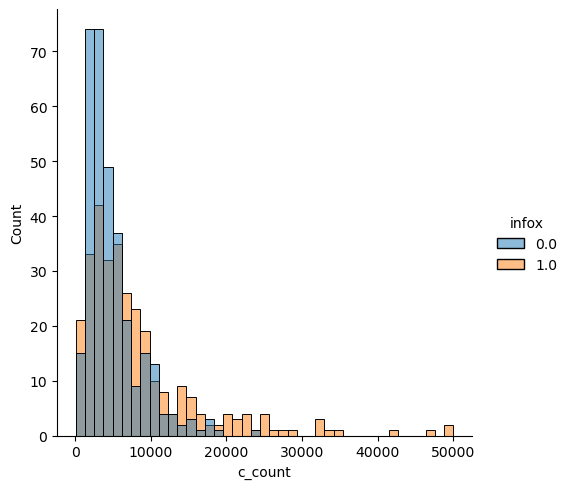

In [20]:
sns.displot(df_infox,x='c_count',hue='infox')

TypeError: Could not convert https://www.alnas.fr/actualite/communaute/larabie-saoudite-organise-des-celebrations-dhalloween-autrefois-interdites/https://www.alnas.fr/actualite/en-vrac/quel-art-un-etudiant-en-droit-invente-un-systeme-ingenieux-pour-tricher-pendant-ses-examens/https://www.alnas.fr/actualite/politique/laustralie-ne-reconnait-plus-jerusalem-comme-capitale-disrael/https://www.alnas.fr/actualite/communaute/nantes-une-mere-musulmane-meurt-poignardee-en-pleine-rue-le-suspect-en-fuite/https://www.alnas.fr/actualite/en-vrac/la-france-condamnee-pour-avoir-place-un-enfant-musulman-dans-une-famille-chretienne/https://www.alnas.fr/actualite/communaute/hassan-iquioussen-la-justice-belge-refuse-de-remettre-limam-a-la-france/https://www.alnas.fr/actualite/en-vrac/les-emirats-arabes-unis-et-larabie-saoudite-fournissent-764-des-besoins-du-japon-en-petrole/https://www.anguillesousroche.com/actualite/ouverture-du-gazoduc-baltic-pipe-qui-relie-la-norvege-et-la-pologne/https://www.anguillesousroche.com/actualite/jusqua-present-seuls-9-des-30-etats-membres-de-lotan-ont-exprime-leur-soutien-a-la-candidature-de-lukraine-a-lotan/https://www.anguillesousroche.com/internet/rumble-declare-quil-ne-modifiera-pas-sa-politique-pour-satisfaire-les-exigences-de-la-france-en-matiere-de-censure/https://www.anguillesousroche.com/changement-climatique/article-dopinion-du-ny-times-saccoupler-avec-des-personnes-de-petite-taille-pour-mettre-fin-au-changement-climatique/https://www.bvoltaire.fr/faux-semblants-et-vraies-raisons-du-recul-de-lage-de-depart-a-la-retraite/https://www.bvoltaire.fr/la-manif-pour-tous-10-ans-apres-que-reste-t-il/https://www.bvoltaire.fr/edito-soiree-en-non-mixite-delisabeth-borne-imaginez-une-minute-que-jean-castex-ait-fait-de-meme/https://www.bvoltaire.fr/pour-les-feministes-miss-france-est-discriminatoire-et-ca-se-regle-aux-prudhommes/https://www.bvoltaire.fr/prediction-pour-2023-ca-va-bien-se-passer-jusqua-la-catastrophe-annoncee/https://www.breizh-info.com/2020/05/16/143858/rennes-vols-commerciaux-aeroport/https://www.breizh-info.com/2022/05/15/186647/afrique-du-sud-lafrikaans-le-khoi-et-le-san-reconnus-comme-langues-indigenes/https://www.breizh-info.com/2022/05/14/186359/open-de-linternational-2022/https://www.breizh-info.com/2022/05/12/186460/le-president-du-conseil-departemental-22-christian-coail-se-met-en-retrait-du-ps/https://www.breizh-info.com/2022/05/10/186309/legislatives-en-bretagne-le-parti-breton-presente-34-candidats/https://www.breizh-info.com/2022/05/09/186196/laffiche-de-campagne-polemique-de-ludmf-democrates-musulmans/https://www.breizh-info.com/2022/05/18/186653/laurent-gaudeau-reconquete-44/https://www.breizh-info.com/2022/05/17/186771/melenchon-a-nantes-ce-17-mai-leau-manque-les-socialistes-aussi/https://www.breizh-info.com/2022/05/19/186704/la-plus-ancienne-statue-de-saint-yves-se-trouve-a-plouegat-guerrand-14eme-siecle/https://www.breizh-info.com/2022/05/19/186767/lampedusa-sicile-mai-2022/https://www.breizh-info.com/2022/05/19/186742/bill-gates-dose-rappel-mai-2022/https://www.breizh-info.com/2022/05/17/186594/baccalaureat-2022-conseils-stress/https://www.breizh-info.com/2022/05/19/186903/viktor-orban-les-medias-occidentaux-modernes-sont-alignes-sur-lopinion-de-gauche/https://www.breizh-info.com/2022/05/06/186234/3-conseils-pour-estimer-son-bien-immobilier/https://www.breizh-info.com/2022/05/20/186968/deces-de-deux-adultes-et-dun-enfant-emportes-par-une-vague-a-pors-loubous-plogoff-29/https://www.breizh-info.com/2022/05/23/186975/boites-noires-mai-role/https://www.breizh-info.com/2022/06/15/188159/the-quiet-girl-un-film-en-langue-gaelique-bat-des-records-au-box-office-en-irlande-et-au-royaume-uni/https://www.breizh-info.com/2022/06/16/188202/2eme-tour-des-legislatives-en-bretagne-37-circonscriptions-37-duels-zero-triangulaire/https://www.breizh-info.com/2022/06/26/188613/saisonniers-internats/https://www.breizh-info.com/2022/06/29/188814/melanie-thomin-nupes-ps-doit-beaucoup-aux-electeurs-du-rn/https://www.breizh-info.com/2022/07/01/188975/residences-secondaires-le-collectif-dispach-reclame-un-statut-de-resident-en-bretagne-et-un-droit-au-logement-pour-tous-les-migrants/https://www.breizh-info.com/2022/07/05/192015/apres-les-elections-legislatives-ludb-passe-a-la-caisse/https://www.breizh-info.com/2022/07/06/192133/vallaud-belkacem-mission-daccueil/https://www.breizh-info.com/2022/07/12/192482/immigration-frontex-alerte-lue-sur-des-vagues-de-migrants-a-venir-en-raison-de-la-crise-alimentaire/https://www.breizh-info.com/2022/07/13/192441/politique-portuaire-bretagne/https://www.breizh-info.com/2022/07/22/193266/lincendie-des-monts-darree-maitrise-quels-impacts-sur-lenvironnement/https://www.breizh-info.com/2022/07/25/193461/tyrannie-sanitaire-450-personnes-a-la-conference-donnee-par-louis-fouche-reinfocovid-en-bretagne-reportage/https://www.breizh-info.com/2022/07/28/193530/radars-double-face-telephone/https://www.breizh-info.com/2022/08/07/206226/docteur-celine-guerre/https://www.breizh-info.com/2022/08/25/207089/zemmour-ruffin-police-medef-a-part-ca-tout-va-bien/https://www.breizh-info.com/2022/08/30/207251/limmigration-clandestine-a-destination-de-leurope-toujours-plus-nombreuse/https://www.breizh-info.com/2022/08/31/207295/christine-kelly-soif-liberte-entretien/https://www.breizh-info.com/2022/09/10/207720/excuse-minorite/https://www.breizh-info.com/2022/09/11/207779/le-projet-horizon-a-callac-un-projet-pervers-et-demoniaque-et-une-menace-pour-le-peuple-breton/https://www.breizh-info.com/2022/07/02/190528/carhaix-un-menhir-erige-par-stonebreizh-dimanche-3-juillet-plus-de-200-volontaires-sollicites/https://www.breizh-info.com/2022/09/17/208038/un-autre-ordre-mondial-en-gestation/https://www.breizh-info.com/2022/09/30/208531/reunification-les-six-insoumis-de-bretagne/https://www.breizh-info.com/2022/10/02/208574/stonehenge-patrimoine-africain-ben-voyons/https://www.breizh-info.com/2022/11/08/210352/la-reconquete-se-fera-par-la-secession-retour-sur-le-colloque-academia-christiana-du-5-novembre-a-paris/https://www.cnews.fr/faits-divers/2022-08-23/saone-et-loire-un-forcene-retranche-dans-un-hotel-de-montceau-les-mineshttps://www.cnews.fr/france/2022-08-23/mayotte-des-centres-de-redressement-pour-les-mineurs-delinquants-1256876https://www.cnews.fr/france/2022-08-23/kohlantess-responsabilite-selection-des-participants-que-contient-le-rapport-duhttps://www.cnews.fr/france/2022-08-23/kohlantess-un-participant-avait-ete-condamne-pour-viol-1256849https://www.dreuz.info/2022/05/invasion-de-lukraine-la-suisse-neutre-se-rapproche-de-lotan-264475.htmlhttps://www.dreuz.info/2022/05/israel-augmente-sa-production-de-gaz-naturel-pour-leurope-qui-seloigne-du-gaz-russe-264490.htmlhttps://www.dreuz.info/2022/05/pourquoi-la-chine-sentete-t-elle-avec-sa-strategie-zero-covid-264527.htmlhttps://www.dreuz.info/2022/05/burkini-dans-les-piscines-municipales-pour-darmanin-le-choix-fait-a-grenoble-est-une-inacceptable-provocation-communautaire-264514.htmlhttps://www.dreuz.info/2022/05/un-centre-de-competences-spatiales-europeen-cree-en-suisse-264621.htmlhttps://www.dreuz.info/2022/06/panique-sur-les-cryptos-267826.htmlhttps://www.dreuz.info/2022/09/lancien-premier-ministre-bernard-cazeneuve-lance-un-manifeste-pour-une-autre-gauche-271200.htmlhttps://www.dreuz.info/2022/09/cest-la-rentree-alors-faites-confiance-au-gouvernement-271204.htmlhttps://www.dreuz.info/2022/09/qui-est-elle-anti-ue-pro-otan-pro-ukraine-pro-israel-anti-immigration-voici-giorgia-meloni-271978.htmlhttps://www.dreuz.info/2022/10/elections-de-mi-mandat-la-campagne-les-sondages-les-tendances-suivi-quotidien-272063.htmlhttps://www.dreuz.info/2022/10/lukraine-est-en-train-de-gagner-la-guerre-272348.htmlhttps://www.dreuz.info/2022/10/la-fda-va-publier-une-etude-sur-les-effets-indesirables-potentiels-du-vaccin-covid-chez-les-personnes-agees-il-etait-temps-272406.htmlhttps://www.dreuz.info/2022/10/binyamin-netanyahou-homme-detat-273464.htmlhttps://www.dreuz.info/2022/11/midterms-non-donald-trump-nest-pas-responsable-de-la-performance-decevante-des-republicains-274247.htmlhttps://www.francesoir.fr/culture-cinema/un-autre-monde-vincent-lindon-captivanthttps://www.francesoir.fr/societe-environnement/eoliennes-surveillance-chauve-sourishttps://www.francesoir.fr/societe-economie/smartphones-reconditionnes-attention-aux-fraudeshttps://www.francesoir.fr/afp-afp/france-leurope-des-solutions-pour-devenir-independante-du-gaz-russe-affirme-bruno-le-mairehttps://www.francesoir.fr/opinions-tribunes/xavier-gorce-quand-na-que-la-hainehttps://www.francesoir.fr/afp-afp/france-yvan-colonna-les-deputes-prevoient-dauditionner-des-cadres-de-la-penitentiairehttps://www.francesoir.fr/afp-afp/france-le-gouvernement-ance-un-vaste-plan-de-controle-des-7500-ehpad-en-deux-anshttps://www.francesoir.fr/opinions-editos/24-heures-dans-la-peau-dune-femmehttps://www.francesoir.fr/politique-monde/finlande-et-suede-adhesion-otanhttps://www.francesoir.fr/politique-france/biometrie-dans-lespace-public-rapport-senathttps://www.francesoir.fr/politique-monde/confinement-centaines-chinois-ont-fui-lusine-de-quantahttps://www.francesoir.fr/politique-monde/gouverneur-floride-7-novembre-journee-victimes-communismehttps://www.francesoir.fr/afp-afp-france/toulouse-un-telepherique-connecte-au-metrohttps://www.francesoir.fr/opinions-editos/de-limportance-de-la-libre-penseehttps://www.francesoir.fr/politique-france/elisabeth-borne-nommee-premiere-ministre-macron-choisi-une-femme-pour-matighttps://www.francesoir.fr/politique-monde/nous-marchons-vers-la-guerre-comme-des-somnambules-henri-guainohttps://www.francesoir.fr/politique-france/burkini-dans-les-piscines-le-conseil-municipal-de-grenoble-donne-son-feu-verthttps://www.francesoir.fr/societe-emploi/sncf-culotte-menstruelle-manque-toiletteshttps://www.francesoir.fr/societe-environnement/eclipse-lunaire-16-mai-rougehttps://www.francesoir.fr/societe-sante/covid-19-problemes-cardiaques-israel-vaccinationhttps://www.francesoir.fr/afp-afp-france/visite-surprise-delizabeth-ii-pour-inaugurer-une-ligne-de-metro-portant-son-nomhttps://www.francesoir.fr/politique-monde/militaires-ukrainiens-azovstahl-reddition-evacuationhttps://www.francesoir.fr/politique-monde/la-russie-expulse-85-diplomates-europeenshttps://www.francesoir.fr/politique-france/crepuscule-de-la-diplomatiehttps://www.francesoir.fr/politique-monde/vatican-nft-metaverse-realite-virtuellehttps://www.francesoir.fr/societe-faits-divers/capes-de-moins-en-moins-de-candidatshttps://www.francesoir.fr/culture-celebrites/cannes-2022-fin-dun-festival-politise-ruben-ostlund-rafle-la-palme-dorhttps://www.francesoir.fr/societe-sante/variole-du-singe-les-premiers-cas-contacts-ont-ete-vaccines-en-france-vendredihttps://www.francesoir.fr/politique-monde/oms-variole-du-singe-ne-pas-sinquieterhttps://www.francesoir.fr/societe-sante/le-maire-de-cholet-demissionne-du-conseil-de-surveillance-de-l-hopital-publichttps://www.francesoir.fr/vie-quotidienne/japon-cafe-teletravail-deadlinehttps://www.francesoir.fr/opinions-editos/de-limportance-de-langlehttps://www.francesoir.fr/opinions-editos/cest-celui-qui-dit-qui-l-esthttps://www.francesoir.fr/politique-monde/le-declin-demographique-de-la-chinehttps://www.francesoir.fr/politique-france/manifestation-hopital-montaubanhttps://www.francesoir.fr/culture-art-expo/renee-gailhoustet-l-architecte-des-hlm-royal-academy-artshttps://www.francesoir.fr/politique-france/legislatives-2022-deuxieme-tourhttps://www.francesoir.fr/societe-faits-divers/mort-brutale-de-stephane-eimer-pdg-des-laboratoires-biogrouphttps://www.francesoir.fr/opinions-editos/de-l-importance-d-une-assemblee-vraiment-nationalehttps://www.francesoir.fr/societe-sante/projet-de-loi-covid-passe-vaccinalhttps://www.francesoir.fr/societe-transport/un-avion-revolutionnaire-hydrogenehttps://www.francesoir.fr/culture-medias/diplomes-obligatoires-pour-les-influenceurs-chinois-sur-tiktokhttps://www.francesoir.fr/culture-art-expo/macron-attali-fresque-murale-polemiquehttps://www.francesoir.fr/societe-sante/roland-garros-epidemie-covid-alize-cornethttps://www.francesoir.fr/opinions-editos/google-desinformateur-criminel-ou-informateur-d-utilite-publiquehttps://www.francesoir.fr/societe-economie/le-secteur-aerien-peine-redecollerhttps://www.francesoir.fr/science-tech/amazon-va-donner-alexa-la-capacite-de-reproduire-les-voix-humaineshttps://www.francesoir.fr/politique-monde/discours-de-politique-generale-huee-elisabeth-borne-appelle-au-compromishttps://www.francesoir.fr/entretien-essentiel/francois-belliothttps://www.francesoir.fr/societe-economie/allianz-entreprises-revolteshttps://www.francesoir.fr/opinions-tribunes/figaro-macron-rassuristehttps://www.francesoir.fr/societe-science-tech/realite-parallele-aeroportshttps://www.francesoir.fr/societe-sante/nouveaux-vaccins-de-rappels-automne-la-folle-course-en-avanthttps://www.francesoir.fr/politique-monde/hong-kong-les-personnes-testees-positives-au-covid-19-devront-porter-un-bracelethttps://www.francesoir.fr/politique-france/un-president-de-la-republique-qui-rend-honneur-petain-mathilde-panothttps://www.francesoir.fr/politique-monde/l-antonov-ecrase-en-grece-avait-stationne-marseille-et-parishttps://www.francesoir.fr/politique-monde/la-france-va-fournir-lallemagne-en-gazhttps://www.francesoir.fr/politique-monde/l-espagne-se-rebelle-face-aux-exigences-de-reduction-de-consommation-de-gazhttps://www.francesoir.fr/lifestyle-bien-etre/charge-mentale-femmeshttps://www.francesoir.fr/opinions-editos/s-interroger-est-il-encore-possible-fausses-verites-contre-vrais-mensongeshttps://www.francesoir.fr/lifestyle-vie-quotidienne/france-connect-arnaque-vols-identifiantshttps://www.francesoir.fr/politique-monde/mbs-visite-europehttps://www.francesoir.fr/politique-monde/le-tribunal-de-l-UE-confirme-la-suspension-de-rt-francehttps://www.francesoir.fr/politique-monde/vaccination-covid-largentine-indemnise-victimes-effets-indesirableshttps://www.francesoir.fr/politique-france/ukraine-la-chaine-americaine-cbs-censure-son-documentairehttps://www.francesoir.fr/politique-monde/chine-des-ecoliers-surveilles-stylos-connecteshttps://www.francesoir.fr/opinions-tribunes/vaccinolatres-et-ukrainolatres-la-meme-technique-de-desinformation-totalitairehttps://www.francesoir.fr/politique-monde/israel-et-la-turquie-se-reconcilient-apres-12-annees-de-rapports-houleuxhttps://www.francesoir.fr/opinions-tribunes/pourquoi-travailler-pour-francesoir-laurence-beneuxhttps://www.francesoir.fr/politique-france/course-karting-prison-fresnes-moretti-ordonne-enquetehttps://www.francesoir.fr/dernier-hommage-sempe-grand-poete-du-dessin-d-humour-l-eglise-de-saint-germain-des-preshttps://www.francesoir.fr/culture/jean-jacques-sempe-dessinateur-du-petit-nicolas-est-mort-l-age-de-89-anshttps://www.francesoir.fr/politique-france/emmanuel-macron-va-se-rendre-en-algerie-pour-poursuivre-le-travail-d-apaisementhttps://www.francesoir.fr/politique-france/guerre-ukraine-macron-previent-les-francais-vont-payer-prix-libertehttps://www.francesoir.fr/politique-france/la-guerre-va-durer-macron-prepare-les-francais-contraintes-de-sobrietehttps://www.francesoir.fr/politique-monde/turquie-petrole-russehttps://www.francesoir.fr/societe-sante/champignons-magiques-depressionhttps://www.francesoir.fr/societe-environnement/le-costa-rica-exemple-en-matiere-de-reforestationhttps://www.francesoir.fr/opinions-editos/vous-avez-la-parole-grace-francesoirhttps://www.francesoir.fr/societe/liberation-renfloue-hauteur-de-15-millions-d-euros-par-le-milliardaire-tcheque-kretinskyhttps://www.francesoir.fr/societe-environnement/compostage-humain-les-funerailles-vertes-gagnent-du-terrain-aux-etats-unishttps://www.francesoir.fr/politique-monde/presidentielle-au-bresil-bolsonaro-talonne-lula-2e-tour-tendu-en-vuehttps://www.francesoir.fr/politique-france/la-france-lance-un-plan-de-sobriete-energetique-tous-azimuts-pour-affronter-lhttps://www.francesoir.fr/societe/decision-de-la-cppap-de-retirer-son-agrement-francesoir-la-reponse-de-xavier-azalberthttps://infodujour.fr/culture/cinema/57892-coupez-vous-ny-couperez-pashttps://infodujour.fr/business/des-entreprises/57882-hausse-des-prix-des-materiaux-qui-en-paye-la-notehttps://infodujour.fr/culture/cinema/62511-cet-argent-magique-qui-disparaithttps://lalettrepatriote.com/augmentation-suspectes-des-prix-lukraine-a-bon-dos-dit-michel-edouard-leclerc/https://lecourrier-du-soir.com/macron-recase-ses-amis-il-promeut-castex-president-de-lagence-de-financement-des-infrastructures-de-transport-de-france/https://www.lelibrepenseur.org/sanna-marine-la-premiere-ministre-finlandaise-chiale-telle-une-collegienne/https://lecourrier-du-soir.com/france-la-plainte-contre-le-professeur-perronne-rejetee-en-colere-lordre-des-medecins-menace-de-faire-appel/https://lecourrier-du-soir.com/31556-2/https://www.lelibrepenseur.org/meteo-le-froid-sempare-de-la-france-faut-il-salarmer-dun-refroidissement-climatique/https://www.lelibrepenseur.org/suede-fin-de-la-recommandation-sur-la-vaccination-universelle-contre-le-covid-19-pour-les-enfants-de-12-a-17-ans/https://www.lelibrepenseur.org/7e-art-selon-le-cnc-les-salles-ont-enregistre-a-peine-74-millions-dentrees-en-france-en-septembre-2022/https://www.lelibrepenseur.org/cannibales-et-ecolo-voici-le-premier-burger-vegan-gout-viande-humaine/https://lemediaen442.fr/mathilde-panot-accusee-dantisemitisme-pour-avoir-prononce-le-mot-rescapee/https://lemediaen442.fr/dictature-acte-1-vote-de-la-loi-de-veille-sanitaire-a-lassemblee/https://lemediaen442.fr/pays-bas-le-gouvernement-veut-reduire-le-cheptel-dun-tiers-le-pays-est-au-bord-de-la-paralysie-complete/https://lemediaen442.fr/le-passe-sanitaire-revient-pour-les-vacances-non-vaccines-et-retifs-aux-tests-seront-bien-emmerdes/https://lemediaen442.fr/la-russie-nest-pas-isolee-un-important-sommet-sest-tenu-en-presence-de-poutine-avec-raissi-iran-et-erdogan-turquie/https://lemediaen442.fr/portugal-la-chaine-dinformation-tvi-annonce-une-inquietante-augmentation-de-20-de-la-mortalite-chez-les-jeunes/https://lemediaen442.fr/vladimir-poutine-annonce-que-leconomie-de-la-russie-sameliore-avec-un-chomage-historiquement-bas-a-39/https://lemediaen442.fr/le-referendum-sur-ladhesion-a-la-russie-a-commence-a-donetsk-malgre-les-bombardements-ukrainiens-qui-ont-tue-six-civils/https://lemediaen442.fr/le-bras-droit-du-president-macron-alexis-kohler-mis-en-examen-pour-prise-illegale-dinterets/https://lemediaen442.fr/un-an-de-prison-avec-sursis-contre-morandini-pour-corruption-de-mineurs-il-voulait-que-je-me-masturbe-devant-lui/https://lemediaen442.fr/volte-face-des-medias-dominants-en-faveur-de-julian-assange-publier-nest-pas-un-crime/https://lesakerfrancophone.fr/ukraine-un-cataclysme-au-regard-de-lhistoirehttps://lesakerfrancophone.fr/quelques-reflexions-sur-le-role-des-idiots-utiles-dans-les-psyops-moderneshttps://lesakerfrancophone.fr/un-etat-des-lieux-mondial-tres-different-sinstallehttps://www.lesalonbeige.fr/combat-politique-ou-combat-religieux/https://www.lesalonbeige.fr/italie-aux-portes-du-pouvoir-meloni-ne-cede-rien-sur-lavortement/https://www.lesalonbeige.fr/plusieurs-francais-ont-ete-poignardes-sans-que-cela-emeuve-beaucoup-les-medias/https://www.lesalonbeige.fr/fin-de-labondance-ou-ruine-deliberee%e2%80%89/https://www.lesalonbeige.fr/la-relation-malaisee-et-contrainte-que-le-president-de-la-republique-entretient-avec-le-peuple/https://www.lesalonbeige.fr/ils-voient-dun-mauvais-oeil-cette-invasion-des-blancs/https://www.lesalonbeige.fr/a-quand-un-episcopat-a-la-hauteur-de-sa-charge/https://www.les-crises.fr/les-lobbys-contre-la-sante-l-incroyable-histoire-du-nutri-score-serge-hercberg/https://www.les-crises.fr/pour-combattre-l-inflation-la-fed-declare-la-guerre-aux-travailleurs/https://www.les-crises.fr/limites-planetaires-l-onu-met-en-garde-contre-un-effondrement-de-la-societe/https://www.les-crises.fr/la-grande-desillusion-reves-liberaux-et-realites-internationales-john-mearsheimer/https://lesdeqodeurs.fr/biden-signe-le-projet-de-loi-sur-lukraine-demande-une-aide-de-40-milliards-de-dollars-dans-la-replique-de-poutine/https://lesdeqodeurs.fr/la-space-force-prend-en-charge-toutes-les-communications-militaires-par-satellite/https://lesdeqodeurs.fr/le-gouvernement-francais-va-recruter-3-000-policiers-verts-pour-lutter-contre-le-changement-climatique/https://lesdeqodeurs.fr/le-premier-ministre-orban-affirme-que-le-scandale-de-corruption-pourrait-atteindre-les-plus-hautes-spheres-de-lunion-europeenne/https://lesobservateurs.ch/2022/07/09/pourquoi-lonu-pense-t-elle-quun-massacre-de-musulmans-est-pire-que-dinnombrables-meurtres-de-chretiens/https://lesobservateurs.ch/2022/07/08/le-11-juillet-a-versailles-macron-deroule-le-tapis-rouge-a-un-ancien-groupe-darmement-nazi/https://lesobservateurs.ch/2022/08/23/les-soldats-britanniques-doivent-se-preparer-a-la-guerre-avec-la-russie-et-prevenir-leurs-proches/https://lesobservateurs.ch/2022/11/15/insecurite-en-france-le-chanteur-daniel-guichard-achete-une-arme-pour-proteger-sa-famille/https://lesobservateurs.ch/2022/12/06/libres-parce-que-nous-le-voulons-bien/https://lezarceleurs.blogspot.com/2022/05/enquete-5g-sur-les-sabotages-dantennes.htmlhttps://lezarceleurs.blogspot.com/2022/07/des-senateurs-refusent-des-informations.htmlhttps://lezarceleurs.blogspot.com/2022/09/lenergie-verte-nest-certainement-pas-la.htmlhttps://lezarceleurs.blogspot.com/2022/10/ukraine-le-gouffre-sans-fond-des.htmlhttps://www.medias-presse.info/pelerinage-de-la-fsspx-a-lourdes-certains-grincheux-sinterrogent-sur-la-presence-des-traditionalistes-dans-le-sanctuaire/164929/https://lesmoutonsrebelles.com/elon-musk-rachete-le-reseau-social-twitter-pour-44-milliards-de-dollars/https://lesmoutonsrebelles.com/la-finlande-favorable-a-une-adhesion-a-lotan-sans-delai-malgre-les-mises-en-garde-de-moscou/https://lesmoutonsrebelles.com/ukraine-emmanuel-macron-promet-a-volodymyr-zelensky-dintensifier-les-livraisons-darmes/https://lesmoutonsrebelles.com/la-finlande-a-officiellement-decide-dadherer-a-lotan-mais-la-croatie-et-la-turquie-sy-opposent/https://lesmoutonsrebelles.com/huile-de-cbd-bio-les-bienfaits-dun-produit-naturel-qui-se-democratise/https://lesmoutonsrebelles.com/pour-marine-le-pen-un-elargissement-de-lotan-ne-favoriserait-pas-la-paix/https://lesmoutonsrebelles.com/le-president-ukrainien-zelensky-sadresse-au-festival-de-cannes-depuis-kiev/https://lesmoutonsrebelles.com/la-russie-demande-la-levee-des-sanctions-pour-eviter-une-crise-alimentaire-mondiale/https://lesmoutonsrebelles.com/les-vers-ronds-comment-sen-debarrasser/https://lesmoutonsrebelles.com/des-milliers-de-personnes-disent-non-a-lotan-a-madrid-ville-hote-de-son-prochain-sommet/https://lesmoutonsrebelles.com/le-passe-sanitaire-revient-pour-les-vacances-non-vaccines-et-retifs-aux-tests-seront-bien-emmerdes/https://lesmoutonsrebelles.com/trump-revient-en-force-je-suis-pour-les-armes-dieu-et-le-petrole/https://lesmoutonsrebelles.com/la-russie-frappe-le-port-dodessa-au-lendemain-de-laccord-sur-lexportation-des-cereales/https://lesmoutonsrebelles.com/victoire-historique-aux-etats-unis-northshore-paiera-10-337-500-pour-indemniser-les-soignants-suspendus/https://lesmoutonsrebelles.com/echange-virulent-elon-musk-propose-des-referendums-dans-le-donbass-et-en-crimee-kiev-sinsurge/https://lesmoutonsrebelles.com/no-comment-zelensky-appelle-lotan-a-porter-des-frappes-preventives-contre-la-russie/https://www.nouvelordremondial.cc/2022/07/12/et-maintenant-une-epidemie-du-virus-de-marburg-a-commence/https://www.nouvelordremondial.cc/2022/08/24/alors-que-singapour-autorise-les-relations-homosexuelles-voici-le-statut-juridique-de-lhomosexualite-dans-le-monde/https://www.nouvelordremondial.cc/2022/09/29/les-ventes-de-fausse-viande-chutent-en-raison-de-la-hausse-des-prix-et-des-messages-wokistes/https://fr.novopress.info/227346/immigration-clandestine-repartir-ou-renvoyer-les-migrants-lheure-des-choix/https://fr.novopress.info/227381/lalgerie-un-pays-jeune-gouverne-par-des-vieillards-par-bernard-lugan/https://fr.novopress.info/227410/un-president-reelu-et-apres-par-philippe-bilger/https://fr.novopress.info/actualite-politique-internationale-culture-sport-depeches/a-la-une/https://fr.novopress.info/228037/comment-survivre-aux-penuries-et-coupures-delectricite-a-venir-le-kit-de-base/https://www.polemia.com/la-droite-face-a-limperatif-culturel/https://www.polemia.com/italie-vers-un-prochain-blocus-a-limmigration-clandestine/https://www.polemia.com/disparition-de-francois-bernard-huyghe-un-phare-en-pleine-tempete/https://www.polemia.com/lola-laura-mauranne-et-les-autres-immigration-responsable-pouvoir-coupable/https://www.polemia.com/quelle-politique-migratoire-pour-la-france-le-contexte-international/https://www.polemia.com/affaire-de-fournas-tout-etait-deja-ecrit-pour-les-medias-de-grand-chemin/https://www.polemia.com/le-qatar-un-ami-qui-nous-veut-du-mal/https://www.preuvesduparanormal.fr/2022/08/19/un-homme-affirme-quapres-avoir-ete-frappe-par-la-foudre-il-a-acquis-un-pouvoir-unique/https://www.profession-gendarme.com/delitement-decadence-ecroulement-fin/https://www.profession-gendarme.com/etude-du-pr-raoult-la-presentation-des-preuves-de-complement-denquete-est-frauduleuse-nicolas-vedrines/https://reseauinternational.net/la-fin-de-la-pax-americana-de-la-chute-dun-empire/https://reseauinternational.net/pourquoi-les-etats-unis-ont-tant-besoin-de-destabiliser-le-continent-europeen/https://reseauinternational.net/grande-bretagne-le-titanic-heurte-liceberg/https://reseauinternational.net/crimee-comment-la-turquie-appelle-a-la-capitulation-de-la-russie/https://reseauinternational.net/education-nationale-la-grande-desertion/https://reseauinternational.net/la-contre-offensive-nest-pas-ukro-elle-est-otan-et-donc-differente/https://reseauinternational.net/tous-les-jeunes-portez-la-nouvelle-russe/https://reseauinternational.net/adhesion-a-la-russie-93-pour-le-oui-dans-la-region-de-zaporijia-87-dans-celle-de-kherson/https://reseauinternational.net/enedis-autorise-a-couper-des-ballons-deau-chaude-a-certaines-heures-via-linky/https://reseauinternational.net/loffensive-hivernale-de-poutine/https://reseauinternational.net/les-differents-visages-des-sous-traitants-de-washington/https://ripostelaique.com/georgia-meloni-rafle-la-mise-un-grand-bravo-a-cette-coalition-des-droites.htmlhttps://ripostelaique.com/oui-la-russie-doit-et-va-faire-tomber-cette-europe-pourrie.htmlhttps://fr.sott.net/article/39999-Otan-apres-la-Finlande-la-Suede-va-officialiser-sa-candidaturehttps://fr.sott.net/article/40035-La-Chine-augmente-ses-importations-d-energie-en-provenance-de-Russiehttps://fr.sott.net/article/40820-Leur-propagande-vient-de-loin-et-nous-le-savonshttps://www.voltairenet.org/article217739.htmlhttps://www.voltairenet.org/article217636.htmlhttps://www.voltairenet.org/article218531.htmlhttps://www.wikistrike.com/2022/05/coree-du-nord-kim-jong-un-decrete-un-confinement-dans-le-confinement-suite-a-l-apparition-d-un-premier-cas-de-covid.htmlhttps://www.wikistrike.com/2022/05/elisabeth-borne-nommee-premiere-ministre.htmlhttps://www.wikistrike.com/2022/05/decouverte-d-un-gouffre-geant-abritant-une-foret-primitive-en-chine.htmlhttps://www.wikistrike.com/2022/05/burkini-dans-les-piscines-le-pavillon-islamique-hisse.htmlhttps://www.wikistrike.com/2022/05/la-russie-rearme-kaliningrad.htmlhttps://www.wikistrike.com/2022/05/le-chu-de-bordeaux-en-mode-degrade-les-patients-seront-accueillis-par-des-benevoles.htmlhttps://www.wikistrike.com/2022/05/la-turquie-bloque-les-pourparlers-d-adhesion-de-la-suede-et-de-la-finlande-a-l-otan-et-presente-une-liste-d-exigences.htmlhttps://www.wikistrike.com/2022/06/irak-decouverte-d-une-cite-antique-vieille-de-3-400-ans.htmlhttps://www.wikistrike.com/2022/06/une-mission-archeologique-egyptienne-met-au-jour-le-plus-grand-ensemble-de-statues-de-bronze-jamais-trouve-a-saqqarah.htmlhttps://www.wikistrike.com/2022/07/n-ecrasez-plus-les-insectes.ils-ressentent-la-douleur.htmlhttps://www.wikistrike.com/2022/07/pfizer-vient-d-etre-condamne-a-75-millions-dollars-pour-avoir-escroque-le-gouvernement-britannique.htmlhttps://www.wikistrike.com/2022/07/l-italie-se-revolte-contre-l-union-europeenne-et-refuse-de-reduire-sa-consommation-de-gaz-de-15.htmlhttps://www.wikistrike.com/2022/07/jour-du-depassement-a-partir-de-ce-jeudi-28-juillet-l-humanite-vit-a-credit.htmlhttps://www.wikistrike.com/2022/08/compteur-linky-les-personnes-electrosensibles-gagnent-leur-proces-contre-enedis.htmlhttps://www.wikistrike.com/2022/08/fresne-cette-prison-ou-les-condagggmnes-finissent-sur-un-kart.htmlhttps://www.wikistrike.com/2022/08/l-un-des-plus-grands-complexes-megalithiques-du-monde-decouvert-en-espagne.htmlhttps://www.wikistrike.com/2023/01/le-chef-du-renseignement-iranien-assure-que-la-cia-dicte-son-carnet-de-route-a-emmanuel-macron.htmlhttps://actu.fr/faits-divers/quatre-morts-dans-accident-route-sur-pont-reliant-france-lallemagne_16624675.htmlhttps://www.francetvinfo.fr/economie/budget/consommation-les-francais-boudent-les-distributeurs-automatiques-de-billets_4779187.htmlhttps://www.francetvinfo.fr/sante/contraception/avortement-le-choix-des-irlandais_2771429.htmlhttps://www.francesoir.fr/culture-celebrites/une-ex-de-cristiano-ronaldo-compare-porno-et-telerealite-videohttps://www.francesoir.fr/afp-afp-france/levee-du-statut-de-detenu-signale-de-colonna-nouvelles-manifestations-en-corsehttps://www.breizh-info.com/2022/04/05/184644/comment-fonctionne-le-systeme-de-burning-dans-la-crypto/https://www.francesoir.fr/lifestyle-vie/quotidienne-alerte-info-trafic-ratp-paris-la-station-concorde-est-fermee-ce-mardihttps://www.francetvinfo.fr/replay-radio/l-etoile-du-jour/les-etoiles-de-2020-a-hong-kong-elise-aide-des-prisonniers-a-envoyer-des-fleurs-a-leurs-proches_4218457.htmlhttps://actu.fr/monde/incendies-en-algerie-au-moins-38-morts-des-scenes-de-desolation-apres-les-feux_53220470.htmlhttps://www.francesoir.fr/culture-celebrites/face-aux-mains-baladeuses-miss-france-est-intransigeantehttps://lezarceleurs.blogspot.com/2021/10/usa-les-tribulations-dun-medecin.htmlhttps://www.francetvinfo.fr/replay-radio/dans-la-peau-de-l-info/dans-la-peau-de-la-foret-amazonienne-plus-que-jamais-la-proie-des-flammes_5327533.htmlhttps://lezarceleurs.blogspot.com/2022/08/usa-fin-des-quarantaines-et-mesures-de.htmlhttps://lesakerfrancophone.fr/oligarchie-ou-patriarcat-regle-par-la-minorite-ou-regle-pour-la-majoritehttps://www.lelibrepenseur.org/covid-19-lue-communique-sur-de-nouveaux-effets-secondaires-des-vaccins-pfizer-et-moderna/https://www.lelibrepenseur.org/lunion-europeenne-de-von-der-leyen-dans-une-tentative-de-corruption-de-la-pologne/https://lesmoutonsrebelles.com/emmerder-lemmerdeur/https://lemediaen442.fr/noam-chomsky-les-non-vaccines-doivent-etre-isoles-de-la-societe-et-se-debrouiller-pour-se-nourrir/https://www.wikistrike.com/2016/03/le-plus-grand-scandale-de-corruption-ou-comment-l-occident-a-achete-l-irak.htmlhttps://infodujour.fr/education/2014-apprendre-la-musique-aux-bebes-pour-favoriser-lacquisition-du-langagehttps://www.wikistrike.com/2021/06/le-fondateur-de-moderna-assure-que-le-covid-19-sort-d-un-labo-de-wuhan.htmlhttps://www.francesoir.fr/societe-sante/covid-les-recherches-google-pour-des-problemes-gastriques-permettent-de-detecter-leshttps://lezarceleurs.blogspot.com/2021/07/usa-infirmites-post-vaccinales-des.htmlhttps://www.wikistrike.com/2019/06/vers-le-tout-chimique-la-france-se-dirige-droit-vers-un-deremboursement-total-de-l-homeopathie.htmlhttps://www.dreuz.info/2021/11/la-lanceuse-dalerte-frances-haugen-auditionnee-au-senat-une-plongee-glacante-dans-larriere-cuisine-de-facebook-254867.htmlhttps://www.francetvinfo.fr/meteo/orages/tempete-aurore-de-puissantes-rafales-de-vent-ont-frappe-le-pays_4816573.htmlhttps://www.francetvinfo.fr/sports/directs/direct-euro-2021-suivez-le-huitieme-de-finale-entre-la-belgique-et-le-portugal_4679333.htmlhttps://www.breizh-info.com/2022/06/08/187726/legislatives-2022-la-profession-de-foi-de-marie-pierre-lecat-candidate-dans-la-3eme-circonscription-des-cotes-darmor/https://reseauinternational.net/lhomme-arbre-regardez-ces-photos-et-vous-nabattrez-plus-un-arbre/https://www.breizh-info.com/2019/10/03/128006/mon-tro-breizh-bretagne/https://www.francetvinfo.fr/sante/handicap/atteint-de-sclerose-en-plaques-julien-vedani-veut-gravir-le-kilimandjaro_4776085.htmlhttps://www.francesoir.fr/societe-science-tech/arche-lunaire-du-sperme-envoye-sur-la-lune-pour-proteger-les-especeshttps://www.breizh-info.com/2022/05/30/187343/la-chute-des-universites-allan-bloom-lame-desarmee/https://www.breizh-info.com/2022/06/04/187346/lespace-nouvelle-frontiere-une-conference-disabelle-sourbes-verger/https://www.francesoir.fr/politique-monde/variole-du-singe-l-oms-active-son-plus-haut-niveau-dalertehttps://www.francetvinfo.fr/internet/telephonie/telephones-portables-les-fausses-promesses-des-appareils-reconditionnes_5337694.htmlhttps://www.dreuz.info/2017/05/donald-trump-recoit-un-accueil-royal-en-arabie-saoudite-135325.htmlhttps://fr.sott.net/article/1686-Anna-Ardin-la-femme-qui-accuse-Julian-Assange-de-viol-a-disparu-des-radarshttps://www.francesoir.fr/culture-cinema/coppola-travaille-sur-megalopolis-son-projet-de-film-le-plus-ambitieuxhttps://www.francesoir.fr/culture-art-expo/le-28-juin-1919-le-traite-de-versailles-met-fin-la-grande-guerrehttps://www.lesalonbeige.fr/petit-rappel-aux-royalistes-de-pacotille-etre-royaliste-cest-avant-tout-etre-catholique/https://www.francesoir.fr/culture-musique/clip-sur-lautoroute-fianso-condamne-4-mois-de-prison-avec-sursishttps://www.francetvinfo.fr/replay-radio/le-billet-sciences-du-week-end/imiter-les-termites-pour-rafraichir-nos-logements_5231581.htmlhttps://www.francesoir.fr/lifestyle-shopping/forfait-mobile-comment-choisir-la-meilleure-offrehttps://fr.sott.net/article/39833-Hubble-confirme-que-Bernardinelli-Bernstein-est-la-plus-grosse-comete-jamais-observee-dans-le-Systeme-solairehttps://fr.novopress.info/219709/vous-regardez-eric-zemmour-a-la-television-decathlon-ne-veut-probablement-plus-de-vous-comme-client-par-jean-david-cattin-les-identitaires/https://www.francetvinfo.fr/replay-radio/franceinfo-passe-a-table/franceinfo-passe-a-table-les-tomates-farcies_5238775.htmlhttps://www.francesoir.fr/lifestyle-gastronomie/que-contiennent-reellement-vos-pates-tartiner to numeric

## Part of Speech

In [27]:
import spacy
from spacy.language import Language

In [28]:
spacy.info()

{'spacy_version': '3.7.2',
 'location': '/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/spacy',
 'platform': 'macOS-13.6-arm64-arm-64bit',
 'python_version': '3.10.11',
 'pipelines': {}}

In [30]:
nlp = spacy.load("fr_core_news_lg")

In [31]:
def get_spacy_doc(text):
    print(text[:80])
    return nlp(text)

In [32]:
df_spacy = df_infox[['infox','text']].copy()

In [33]:
%%time
df_spacy['spacy_doc'] = df_spacy['text'].apply(get_spacy_doc)

L’Arabie saoudite organise des célébrations d' »Halloween » autrefois interdites
« Quel art ! » : un étudiant en droit invente un système ingénieux pour tricher 
L’Australie ne reconnaît plus Jérusalem comme capitale d’Israël
Le gouvernement 
Nantes : une mère musulmane meurt poignardée en pleine rue, le suspect en fuite

La France condamnée pour avoir placé un enfant musulman dans une famille chrétie
Hassan Iquioussen : la justice belge refuse de remettre l’imam à la France
La pe
Les Émirats arabes unis et l’Arabie saoudite fournissent 76,4 % des besoins du J
Ouverture du gazoduc Baltic Pipe, qui relie la Norvège et la Pologne
Les dirigea
La CIA aurait investi dans une puissante technologie de mutation génétique et de
Jusqu’à présent, seuls 9 des 30 États membres de l’OTAN ont exprimé leur soutien
Révélé : des documents montrent comment le DHS complote pour contrôler la « dési
Rumble déclare qu’il ne modifiera pas sa politique pour satisfaire les exigences
Ne vous inquiétez pas, nous 

"Emmanuel Macron est un psychopathe amoral", selon le psychiatre italien Adriano
Le gouvernement va lancer une application d’identité numérique: vers le crédit s
Joe Biden inaugure discrètement un "Comité gouvernemental de la désinformation"

Chronique N°93 – "Ne tester que le Covid peut faire croire à la disparition des 
Brésil : les paradoxes de l'infectiologue David Uip, encensé par la presse mais 
Des soldats français à Marioupol? Francis Lalanne demande un démenti au chef d'é
BMJ Gate : interprétation manipulée des données statistiques au bénéfice des men
Pilotes et scientifiques se regroupent au niveau mondial pour alerter sur les ri
"Un autre monde": Vincent Lindon captivant dans le costume d’un dirigeant au bou
Omicron, le concurrent redouté par Bill Gates
Chaque année, la Conférence de Mun
Des éoliennes mises sous surveillance suite à un taux de mortalité élevé des cha
Smartphones reconditionnés : attention aux fraudes !
Selon un rapport de la Dire
L'Europe a "des solutions po

Présidentielle au Brésil: Bolsonaro talonne Lula, 2e tour tendu en vue
L'ex-prés
La France lance un plan de sobriété énergétique tous azimuts pour affronter l'hi
Est-il encore permis d’avoir des doutes sur la fiabilité du système électoral au
Décision de la CPPAP de retirer son agrément à FranceSoir : la réponse de Xavier
Onde de choc au sein des réseaux du fact-checking: que se cache-t-il derrière la
« Coupez ! », vous n’y couperez pas !
Présenté en ouverture du Festival de Canne
Hausse des prix des matériaux, qui en paye la note ?
Dans le secteur du bâtiment
Covid-19 : les vaccins ne sont pas sans risques, voici pourquoi
Les vaccins que 
Covid-19 : Les effets secondaires camouflés
« Pourquoi l’Office parlementaire qu
Cet argent magique qui disparait
Film de Yannick Kergoat coécrit avec Denis Robe
Tous les vitraux de nos églises et cathédrales menacés par l’Union européenne
C’
« La France insoumise me paraît plus toxique aujourd’hui que le Rassemblement na
Augmentation suspectes des p

Une nouvelle étude montre que presque tout le monde subit des dommages cardiaque
Les 11 millions de dollars de relations chinoises de Hunter
Article original dat
Le dépôt inexpliqué de bulletins de vote lors de l’élection sénatoriale de Géorg
Antifa et Factcheckeurs, même combat !
Intro et précisionsIl est clair que les a
Le Premier ministre Orbán affirme que le scandale de corruption pourrait atteind
Lavrov : Si l’Occident ne s’accommode pas d’une défaite en Ukraine, il n’a rien 
Pourquoi l’ONU pense-t-elle qu’un massacre de musulmans est pire que d’innombrab
Le 11 juillet à Versailles, Macron déroule le tapis rouge à un ancien groupe d’a
Les soldats britanniques doivent se préparer à la guerre avec la Russie et préve
Le Canada est devenu l’apogée du schéma directeur libéral : « l’avortement » peu
Insécurité en France : le chanteur Daniel Guichard achète une arme pour protéger
Libres, parce que nous le voulons bien
Libres, parce que nous le voulons bien



Hérault : 300 musulmans armé

Les ventes de fausse viande chutent en raison de la hausse des prix et des messa
Immigration clandestine : répartir ou renvoyer les migrants ? L’heure des choix

L’Algérie, un pays jeune gouverné par des vieillards, par Bernard Lugan
L’Algéri
Un président réélu : et après ?, par Philippe Bilger
On ne peut pas s’empêcher d
Qui est Alexandre Douguine? Anatomie d’une pensée radicale et complexe
L’assassi
Comment survivre aux pénuries et coupures d’électricité à venir ? Le Kit de Base
La droite face à l’impératif culturel
Par Thierry De Cruzy, journaliste ♦ Commen
Élisabeth Borne et l’école : cynisme et déconstruction
Par Claude Meunier-Berthe
Jean-François Carenco à l’Outre-Mer : mensonge et répression au programme ?
Par 
Le défilé du 14 juillet, une histoire du lien national
« L’armée n’est mise à l’
Une guerre civile menée contre les peuples indigènes d’Europe ?
Facebook



Twit
Les J.O. 2024 en Seine-Saint-Denis : une folie criminelle ?
Par Camille Galic, j
Pouvoir d’achat : la grande 

Fake news ? Les deux députés de LFI,  Raquel Garrido  et  Alexis Corbiere , empl
BHL condamné par la justice pour avoir touché 9 millions d’euros du Qatar pour s
Moutarde, huile: L'arnaque à la pénurie
Marc Bildermann pour WikiStrike


La mou
L'AFNOR prouve que le masque « grand public » recommandé par le gouvernement est
Ursula von der Leyen ne retrouve plus ses SMS adressés à Bourla, patron de Pfize
N'écrasez plus les insectes !... Ils ressentent la douleur
Mouches, fourmis ou c
Donbass: Deux nouveaux laboratoires militaires découverts ?
WARNING - De la déco
Pfizer vient d’être condamné à 75 millions dollars pour avoir escroqué le gouver
L’Italie se révolte contre l’Union Européenne et refuse de réduire sa consommati
Variole du singe: Comme si les terriens étaient en danger, l'OMS déclenche son p
Un sosie de Poutine a-t-il été envoyé en Iran ?
Un sosie de Biden, on le saurait
“Jour du dépassement”: à partir de ce jeudi 28 juillet, l’humanité vit à crédit

Étude: 22 % des moins de 50 

Anna Ardin, la femme qui accuse Julian Assange de viol, a disparu des radars
Ann
Coppola travaille sur "Megalopolis", son projet de film "le plus ambitieux"
Fran
Le 28 juin 1919, le traité de Versailles met fin à la Grande Guerre
Le 28 juin 1
Charlatanisme d’état : « Tout savoir sur le rappel vaccinal contre la Covid-19 »
Petit rappel aux royalistes de pacotille: être royaliste, c’est avant tout, être
Clip sur l'autoroute: Fianso condamné à 4 mois de prison avec sursis
Le tribunal
Imiter les termites pour rafraîchir nos logements
Tous les week-ends de l’été, n
Guerre en Ukraine : l’attaque du théâtre de Marioupol est utilisée par l’Occiden
Forfait mobile : comment choisir la meilleure offre ?
Les forfaits mobiles sont 
Hubble confirme que Bernardinelli-Bernstein est la plus grosse comète jamais obs
Vous regardez Éric Zemmour à la télévision ? Decathlon ne veut probablement plus
franceinfo passe à table : les tomates farcies
Chaque jour, un membre de la réda
Que contiennent réellement v

In [35]:
df_spacy

,infox,text,spacy_doc
0,0.0,L’Arabie saoudite organise des célébrations d'...,"(L’, Arabie, saoudite, organise, des, célébrat..."
1,0.0,« Quel art ! » : un étudiant en droit invente ...,"(«, , Quel, art, !, , », :, un, étudiant, en..."
2,0.0,L’Australie ne reconnaît plus Jérusalem comme ...,"(L’, Australie, ne, reconnaît, plus, Jérusalem..."
3,0.0,Nantes : une mère musulmane meurt poignardée e...,"(Nantes, :, une, mère, musulmane, meurt, poign..."
4,0.0,La France condamnée pour avoir placé un enfant...,"(La, France, condamnée, pour, avoir, placé, un..."
...,...,...,...
626,0.0,Hubble confirme que Bernardinelli-Bernstein es...,"(Hubble, confirme, que, Bernardinelli, -, Bern..."
627,0.0,Vous regardez Éric Zemmour à la télévision ? D...,"(Vous, regardez, Éric, Zemmour, à, la, télévis..."
628,0.0,franceinfo passe à table : les tomates farcies...,"(franceinfo, passe, à, table, :, les, tomates,..."
629,0.0,Que contiennent réellement vos pâtes à tartine...,"(Que, contiennent, réellement, vos, pâtes, à, ..."


In [36]:
from collections import Counter
def get_linguistic_features(row):
    text = row['text']
    doc = row['spacy_doc']
    nb_token = len(doc)
    row['nb_token'] = nb_token
    row['nb_sent'] = len(row['text'].split('.'))
    row['nb_exclam'] = text.count('?')+text.count('!')+text.count('()')+text.count(')')
    token_pos = [token.pos_ for token in doc]
    pos_counter = Counter(token_pos)
    for pos in pos_counter:
        row[pos] = pos_counter[pos]    
    return row

In [37]:
%%time
df_features = df_spacy.apply(get_linguistic_features, axis=1)

CPU times: user 1.89 s, sys: 4.38 ms, total: 1.89 s
Wall time: 1.89 s


In [38]:
df_features = df_features.fillna(0)

In [39]:
no_scale_columns = ['infox','nb_token', 'spacy_doc', 'text','nb_sent'] 
df_pos = df_features.drop(columns=['infox', 'spacy_doc', 'text']).astype(int)
df_y = df_features[['infox']].astype(int)

In [40]:
df_pos

,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PRON,PROPN,PUNCT,SCONJ,SPACE,SYM,VERB,X,nb_exclam,nb_sent,nb_token
0,24,63,27,28,9,58,0,77,3,21,29,49,5,10,0,46,2,1,14,451
1,9,55,14,22,5,56,0,73,1,19,11,37,5,10,0,45,0,2,12,362
2,42,71,14,23,9,77,0,95,3,11,46,55,6,15,0,42,0,0,17,509
3,21,58,10,24,4,53,0,84,4,16,9,57,3,6,0,37,0,1,18,386
4,27,49,13,18,8,45,0,62,6,4,5,20,6,5,0,29,0,2,8,297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,54,141,56,31,22,111,0,175,18,46,84,98,20,14,0,71,5,10,29,946
627,29,76,33,15,8,61,0,97,0,28,22,48,5,7,0,39,0,6,19,468
628,12,41,31,6,9,45,0,81,1,36,7,44,7,5,0,36,1,3,16,362
629,27,54,26,13,9,38,0,70,10,16,8,41,2,4,0,30,1,8,11,349


In [41]:
df_pos['sent_size']=df_pos['nb_token']/df_pos['nb_sent']

In [42]:
df_pos[df_y['infox']==0]['sent_size'].describe()

count    326.000000
mean      30.619441
std        7.085949
min       14.483871
25%       25.973529
50%       29.970588
75%       33.901215
max       60.533333
Name: sent_size, dtype: float64

In [43]:
df_pos[df_y['infox']==1]['sent_size'].describe()

count    305.000000
mean      31.937950
std       13.385234
min        8.205882
25%       25.880000
50%       30.281250
75%       35.820000
max      171.666667
Name: sent_size, dtype: float64

In [101]:
def normalize(row):
    nb_token = row['nb_token']
    row = row.apply(lambda x : x/nb_token)
    row['nb_token'] = nb_token
    return row

df_pos_norm = df_pos.apply(normalize,axis=1)

df_pos_norm

,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PRON,...,PUNCT,SCONJ,SPACE,SYM,VERB,X,nb_exclam,nb_sent,nb_token,sent_size
0,0.05,0.14,0.06,0.06,0.02,0.13,0.0,0.17,6.65e-03,0.05,...,0.11,1.11e-02,0.02,0.0,0.10,4.43e-03,2.22e-03,0.03,451.0,0.07
1,0.02,0.15,0.04,0.06,0.01,0.15,0.0,0.20,2.76e-03,0.05,...,0.10,1.38e-02,0.03,0.0,0.12,0.00e+00,5.52e-03,0.03,362.0,0.08
2,0.08,0.14,0.03,0.05,0.02,0.15,0.0,0.19,5.89e-03,0.02,...,0.11,1.18e-02,0.03,0.0,0.08,0.00e+00,0.00e+00,0.03,509.0,0.06
3,0.05,0.15,0.03,0.06,0.01,0.14,0.0,0.22,1.04e-02,0.04,...,0.15,7.77e-03,0.02,0.0,0.10,0.00e+00,2.59e-03,0.05,386.0,0.06
4,0.09,0.16,0.04,0.06,0.03,0.15,0.0,0.21,2.02e-02,0.01,...,0.07,2.02e-02,0.02,0.0,0.10,0.00e+00,6.73e-03,0.03,297.0,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,0.06,0.15,0.06,0.03,0.02,0.12,0.0,0.18,1.90e-02,0.05,...,0.10,2.11e-02,0.01,0.0,0.08,5.29e-03,1.06e-02,0.03,946.0,0.03
627,0.06,0.16,0.07,0.03,0.02,0.13,0.0,0.21,0.00e+00,0.06,...,0.10,1.07e-02,0.01,0.0,0.08,0.00e+00,1.28e-02,0.04,468.0,0.05
628,0.03,0.11,0.09,0.02,0.02,0.12,0.0,0.22,2.76e-03,0.10,...,0.12,1.93e-02,0.01,0.0,0.10,2.76e-03,8.29e-03,0.04,362.0,0.06
629,0.08,0.15,0.07,0.04,0.03,0.11,0.0,0.20,2.87e-02,0.05,...,0.12,5.73e-03,0.01,0.0,0.09,2.87e-03,2.29e-02,0.03,349.0,0.09


### Comparaison moyenne autres features

In [102]:
desc_1 = df_pos_norm[df_y['infox']==1].describe()
desc_0 = df_pos_norm[df_y['infox']==0].describe()

df_desc_ratio =(desc_1/desc_0).loc[['mean']].T.sort_values('mean')

pos_names = {
    'ADJ': 'adjective',
    'ADP': 'adposition',
    'ADV': 'adverb',
    'AUX': 'auxiliary',
    'CCONJ': 'coordinating conjunction',
    'DET': 'determiner',
    'INTJ': 'interjection',
    'NOUN': 'noun',
    'NUM': 'numeral',
    'PART': 'particle',
    'PRON': 'pronoun',
    'PROPN': 'proper noun',
    'PUNCT': 'punctuation',
    'SCONJ': 'subordinating conjunction',
    'SYM': 'symbol',
    'VERB': 'verb',
    'X': 'other',
}

df_desc_ratio['comment'] = df_desc_ratio.index.map(lambda pos : pos_names.get(pos,''))
df_desc_ratio

,mean,comment
sent_size,0.80,
PUNCT,0.93,punctuation
ADP,0.94,adposition
NOUN,0.97,noun
PROPN,0.97,proper noun
NUM,0.98,numeral
DET,0.99,determiner
nb_sent,1.01,
VERB,1.01,verb
ADV,1.05,adverb


### Benchmark Machine Learning

In [46]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import (AdaBoostClassifier,
                              HistGradientBoostingClassifier,
                              RandomForestClassifier)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [47]:
predictors = {
    "Logistic Regression" : LogisticRegression(C=1000, random_state=random_state, solver='lbfgs', multi_class='ovr', max_iter=1000),
    "Neural Network" : MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(8,8), random_state=random_state),
#    "RBF SVM" : SVC(gamma=2, C=1, probability=True, random_state=random_state),
#    "Gaussian Naive Bayes" : GaussianNB(),
#    "Multinomial Naive Bayes" : MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None),
#    "Nearest Neighbors" : KNeighborsClassifier(3),
#    "Linear SVM" : SVC(kernel="linear", C=0.025, probability=True, random_state=random_state),
#    "Gaussian Process" : GaussianProcessClassifier(1.0 * RBF(1.0), random_state=random_state),
#    "Decision Tree" : DecisionTreeClassifier(max_depth=5, random_state=random_state),
#    "Random Forest" : RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=random_state),
#    "AdaBoost" : AdaBoostClassifier(random_state=random_state),
#    "QDA" : QuadraticDiscriminantAnalysis(),
#    'Gradient Boosting': HistGradientBoostingClassifier(random_state=random_state),
#    'Dummy' : DummyClassifier(strategy='uniform', random_state=random_state),
}

In [48]:
train_size = 0.75

In [49]:
import patat.ml.benchmark

In [50]:
importlib.reload(patat.ml.benchmark)

<module 'patat.ml.benchmark' from '/Volumes/Geek/Work/Patat/patat/ml/benchmark.py'>

In [51]:
bench = patat.ml.benchmark.Benchmark()

In [52]:
df_X=df_pos_norm[['nb_token','SPACE','SCONJ','nb_exclam','INTJ']]
df_bench = bench.benchmark(df_X,df_y['infox'],train_size=0.8,random_state=random_state)


INFO:root:Training Logistic Regression
INFO:root:Training time : 0.007224082946777344 s
INFO:root:Training Neural Network
INFO:root:Training time : 0.04391026496887207 s
INFO:root:Training Nearest Neighbors
INFO:root:Training time : 0.0011448860168457031 s
INFO:root:Training Linear SVM
INFO:root:Training time : 5.963484764099121 s
INFO:root:Training Gaussian Process
INFO:root:Training time : 0.3382408618927002 s
INFO:root:Training Decision Tree
INFO:root:Training time : 0.0029540061950683594 s
INFO:root:Training Random Forest
INFO:root:Training time : 0.009584903717041016 s
INFO:root:Training AdaBoost
INFO:root:Training time : 0.040769100189208984 s
INFO:root:Training QDA
INFO:root:Training time : 0.001138925552368164 s
INFO:root:Training Gradient Boosting
INFO:root:Training time : 1.3432540893554688 s
INFO:root:Training Dummy
INFO:root:Training time : 0.00030803680419921875 s
INFO:root:Training Done !
INFO:root:Best ROC AUC : 0.7930521091811414


In [53]:
df_bench = df_bench.sort_values(by='roc_auc',ascending=False)

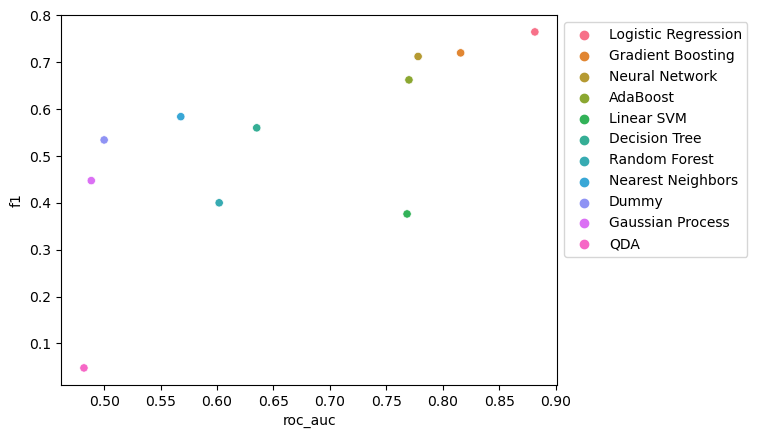

In [103]:
ax = sns.scatterplot(df_bench,y='f1',x='roc_auc',hue=df_bench.index)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [55]:
df_bench

,roc_auc,f1,accuracy,recall,log_loss,false_positive,false_negative,fit_time,proba_time
QDA,0.793052,0.589474,0.692913,0.451613,11.068523,0.039370,0.267717,0.001139,0.000601
Random Forest,0.773945,0.672269,0.692913,0.645161,11.068523,0.133858,0.173228,0.009585,0.000906
Neural Network,0.741191,0.704918,0.716535,0.693548,10.217099,0.133858,0.149606,0.043910,0.000586
Linear SVM,0.741191,0.365854,0.590551,0.241935,14.758031,0.039370,0.370079,5.963485,0.001254
Logistic Regression,0.740943,0.622642,0.685039,0.532258,11.352332,0.086614,0.228346,0.007224,0.000571
Gradient Boosting,0.726303,0.677419,0.685039,0.677419,11.352332,0.157480,0.157480,1.343254,0.014501
AdaBoost,0.714888,0.654867,0.692913,0.596774,11.068523,0.110236,0.196850,0.040769,0.003121
Decision Tree,0.700620,0.577320,0.677165,0.451613,11.636140,0.055118,0.267717,0.002954,0.000424
Nearest Neighbors,0.545285,0.571429,0.551181,0.612903,16.177073,0.259843,0.188976,0.001145,0.001083
Gaussian Process,0.512283,0.460317,0.464567,0.467742,19.298964,0.275591,0.259843,0.338241,0.005553


## Ignore Words / Lemmas

In [56]:
import patat.util.text
import patat.ml.lex_analyser
lex = patat.ml.lex_analyser.LexAnalyser()

### Lemmas

In [57]:
preprocessor = patat.util.text.preprocess
tokenizer = lex.get_lemmas_from_text

In [58]:
df_words = lex.get_df_words(texts= df_infox['text'],values = df_infox['infox'].astype(int), preprocessor=preprocessor, tokenizer= tokenizer)
### Rare Words
for occ_rare in [1,2,3,4,5,6,7]:
    df_words['rare_'+str(occ_rare)]=(df_words['count_0']<=occ_rare)&(df_words['count_1']<=occ_rare)
### Common words
for common_size in [50,80,120,200,500]:
    common_0 = df_words.sort_values('count_0',ascending=False).head(common_size).index
    common_1 = df_words.sort_values('count_1',ascending=False).head(common_size).index
    df_words['common_'+str(common_size)]=(df_words.index.isin(common_0))&(df_words.index.isin(common_1))
### Ignore Lemmas
ignore_lemmas={
    'None' : None,
    'small' : list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_1']].index),
    'medium' : list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_2']].index),
    'large' : list(df_words[df_words['common_200']].index)+list(df_words[df_words['rare_5']].index),
    'xlarge' : list(df_words[df_words['common_500']].index)+list(df_words[df_words['rare_7']].index),
}

/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [59]:
df_words

,count_0,count_1,count,rare_1,rare_2,rare_3,rare_4,rare_5,rare_6,rare_7,common_50,common_80,common_120,common_200,common_500
de,13792,20809,34601,False,False,False,False,False,False,False,True,True,True,True,True
la,7998,11129,19127,False,False,False,False,False,False,False,True,True,True,True,True
le,5902,8951,14853,False,False,False,False,False,False,False,True,True,True,True,True
et,5274,8782,14056,False,False,False,False,False,False,False,True,True,True,True,True
les,5179,9243,14422,False,False,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
irréprochabilité,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
irréprochable,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
irrésistiblement,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
irs,0,2,2,False,True,True,True,True,True,True,False,False,False,False,False


### Words

In [60]:
tokenizer = lex.get_words

In [61]:
df_words = lex.get_df_words(texts= df_infox['text'],values = df_infox['infox'].astype(int), preprocessor=preprocessor, tokenizer= tokenizer)
### Rare Words
for occ_rare in [1,2,3,4,5,6,7]:
    df_words['rare_'+str(occ_rare)]=(df_words['count_0']<=occ_rare)&(df_words['count_1']<=occ_rare)
### Common words
for common_size in [50,80,120,200,500]:
    common_0 = df_words.sort_values('count_0',ascending=False).head(common_size).index
    common_1 = df_words.sort_values('count_1',ascending=False).head(common_size).index
    df_words['common_'+str(common_size)]=(df_words.index.isin(common_0))&(df_words.index.isin(common_1))
### Ignore Lemmas
ignore_words={
    'None' : None,
    'small' : list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_1']].index),
    'medium' : list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_2']].index),
    'large' : list(df_words[df_words['common_200']].index)+list(df_words[df_words['rare_5']].index),
    'xlarge' : list(df_words[df_words['common_500']].index)+list(df_words[df_words['rare_7']].index),
}

/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [62]:
for key in ['small','medium','large','xlarge']:
    print(key,len(ignore_words[key]))

small 18928
medium 24908
large 31115
xlarge 33001


In [63]:
ignore_words

{'None': None,
 'small': ['de',
  'la',
  'le',
  'et',
  'les',
  'des',
  'en',
  'un',
  'est',
  'du',
  'une',
  'que',
  'pour',
  'qui',
  'dans',
  'il',
  'par',
  'sur',
  'pas',
  'au',
  'plus',
  'ce',
  'qu',
  'ne',
  'ont',
  'se',
  'avec',
  'sont',
  'été',
  'ou',
  'son',
  'nous',
  'aux',
  'mais',
  'cette',
  'comme',
  'elle',
  'on',
  'fait',
  'être',
  'tout',
  'ces',
  'même',
  'pays',
  'si',
  'sa',
  'leur',
  'aussi',
  'ses',
  'ils',
  'vous',
  'je',
  'bien',
  'sans',
  'contre',
  'faire',
  'après',
  'avait',
  'entre',
  'deux',
  'monde',
  'russie',
  'depuis',
  'était',
  'peut',
  'autres',
  'covid',
  'tous',
  'cela',
  'ukraine',
  'leurs',
  'très',
  'retoqué',
  'raidir',
  'saturne',
  'saubot',
  'militari',
  'pudeur',
  'inflationary',
  'perpétuer',
  'satisfaite',
  'infiltre',
  'savane',
  'saisissant',
  'passifs',
  'saletés',
  'indéfiniment',
  'poète',
  'perdure',
  'politologues',
  'perpétuellement',
  'passeront

In [64]:
df_words

,count_0,count_1,count,rare_1,rare_2,rare_3,rare_4,rare_5,rare_6,rare_7,common_50,common_80,common_120,common_200,common_500
de,13792,20809,34601,False,False,False,False,False,False,False,True,True,True,True,True
la,7998,11129,19127,False,False,False,False,False,False,False,True,True,True,True,True
le,5902,8951,14853,False,False,False,False,False,False,False,True,True,True,True,True
et,5274,8782,14056,False,False,False,False,False,False,False,True,True,True,True,True
les,5179,9243,14422,False,False,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
intempérie,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
intello,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
intelligenceiii,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
intellectuels,0,2,2,False,True,True,True,True,True,True,False,False,False,False,False


## CountVectorizer

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
df_texts = df_infox

In [66]:
tokenizer = lex.get_words

In [67]:
benches = {}
for key in ignore_words.keys():
    vectorizer = CountVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer, stop_words=ignore_words[key])
    count_matrix = vectorizer.fit_transform(df_infox['text'])
    count_array = count_matrix.toarray()
    df_tf = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
    df_X = df_tf
    df_bench = bench.benchmark(df_X,df_texts['infox'],predictors=predictors,train_size=train_size,random_state=random_state)
    df_bench = df_bench.sort_values('roc_auc',ascending=False)
    benches[key] = df_bench

/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
INFO:root:Training Logistic Regression
INFO:root:Training time : 2.217872142791748 s
INFO:root:Training Neural Network
INFO:root:Training time : 5.882966041564941 s
INFO:root:Training Done !
INFO:root:Best ROC AUC : 0.825717492384159
/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
INFO:root:Training Logistic Regression
INFO:root:Training time : 0.3311941623687744 s
INFO:root:Training Neural Network
INFO:root:Training time : 3.023588180541992 s
INFO:root:Training Done !
INFO:root:Best ROC AUC : 0.828443161776495
/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/s

In [76]:
for key in benches:
    print(f'{key} : {benches[key].roc_auc.max()}')

None : 0.8694885361552027
small : 0.8802308802308803
medium : 0.8781465448132115
large : 0.880391213724547
xlarge : 0.8621131954465288


In [77]:
df_bench=benches['None']
df_bench

,roc_auc,f1,accuracy,recall,log_loss,false_positive,false_negative,fit_time,proba_time
Logistic Regression,0.869489,0.765957,0.791139,0.701299,7.528105,0.063291,0.145570,0.412436,0.136459
Neural Network,0.867885,0.780142,0.803797,0.714286,7.071856,0.056962,0.139241,25.730993,0.137170


In [78]:
df_bench=benches['xlarge']
df_bench

,roc_auc,f1,accuracy,recall,log_loss,false_positive,false_negative,fit_time,proba_time
Neural Network,0.862113,0.763889,0.78481,0.714286,7.756229,0.075949,0.139241,3.522386,0.019396
Logistic Regression,0.859548,0.760563,0.78481,0.701299,7.756229,0.069620,0.145570,0.114746,0.019221


## TF/IDF Words

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
df_texts = df_infox

In [80]:
tokenizer = lex.get_words

In [81]:
benches = {}
for key in ignore_words.keys():
    vectorizer = TfidfVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer, stop_words=ignore_words[key])
    count_matrix = vectorizer.fit_transform(df_infox['text'])
    count_array = count_matrix.toarray()
    df_tf = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
    df_X = df_tf
    df_bench = bench.benchmark(df_X,df_texts['infox'],predictors=predictors,train_size=train_size,random_state=random_state)
    df_bench = df_bench.sort_values('roc_auc',ascending=False)
    benches[key] = df_bench

/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
INFO:root:Training Logistic Regression
INFO:root:Training time : 0.4090602397918701 s
INFO:root:Training Neural Network
INFO:root:Training time : 25.931516885757446 s
INFO:root:Training Done !
INFO:root:Best ROC AUC : 0.8694885361552027
/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
INFO:root:Training Logistic Regression
INFO:root:Training time : 0.3343772888183594 s
INFO:root:Training Neural Network
INFO:root:Training time : 9.074546813964844 s
INFO:root:Training Done !
INFO:root:Best ROC AUC : 0.8802308802308803
/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packag

In [82]:
for key in benches:
    print(f'{key} : {benches[key].roc_auc.max()}')

None : 0.8694885361552027
small : 0.8802308802308803
medium : 0.8781465448132115
large : 0.880391213724547
xlarge : 0.8621131954465288


In [83]:
df_bench=benches['small']
df_bench

,roc_auc,f1,accuracy,recall,log_loss,false_positive,false_negative,fit_time,proba_time
Neural Network,0.880231,0.814286,0.835443,0.740260,5.931234,0.037975,0.126582,9.074547,0.069381
Logistic Regression,0.879590,0.794326,0.816456,0.727273,6.615607,0.050633,0.132911,0.334377,0.068248


## TF/IDF Lemmas

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
df_texts = df_infox

In [85]:
tokenizer = lex.get_lemmas_from_text

In [86]:
benches = {}
for key in ignore_lemmas.keys():
    vectorizer = TfidfVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer, stop_words=ignore_lemmas[key])
    count_matrix = vectorizer.fit_transform(df_infox['text'])
    count_array = count_matrix.toarray()
    df_tf = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
    df_X = df_tf
    df_bench = bench.benchmark(df_X,df_texts['infox'],predictors=predictors,train_size=train_size,random_state=random_state)
    df_bench = df_bench.sort_values('roc_auc',ascending=False)
    benches[key] = df_bench

/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
INFO:root:Training Logistic Regression
INFO:root:Training time : 0.6177098751068115 s
INFO:root:Training Neural Network
INFO:root:Training time : 13.723562002182007 s
INFO:root:Training Done !
INFO:root:Best ROC AUC : 0.8762225428892096
/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aboutir', 'abrutir', 'affilier', 'agir', 'alambiquer', 'ambitieux', 'bouil

In [87]:
for key in benches:
    print(f'{key} : {benches[key].roc_auc.max()}')

None : 0.8762225428892096
small : 0.8863235529902196
medium : 0.8877665544332211
large : 0.8722142055475388
xlarge : 0.8651595318261985


In [88]:
df_bench=benches['small']
df_bench

,roc_auc,f1,accuracy,recall,log_loss,false_positive,false_negative,fit_time,proba_time
Logistic Regression,0.886324,0.849315,0.860759,0.805195,5.018737,0.044304,0.094937,0.296303,0.048659
Neural Network,0.885522,0.763359,0.803797,0.649351,7.071856,0.025316,0.170886,13.703679,0.048517


## Augmentation données entrainement avec AFP

In [89]:
df_texts_afp =  pd.read_csv('data/demo/221221-TextAfp.csv')

In [90]:
afp_size = 20
df_texts = pd.concat([df_infox,df_texts_afp.sample(afp_size,random_state=random_state)])

In [91]:
tokenizer = lex.get_lemmas_from_text
#tokenizer = lex.get_words

In [92]:
benches = {}
for key in ['None','small','large']:
    vectorizer = TfidfVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer, stop_words=ignore_lemmas[key])
    count_matrix = vectorizer.fit_transform(df_texts['text'])
    count_array = count_matrix.toarray()
    df_tf = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
    df_X = df_tf
    df_bench = bench.benchmark(df_X,df_texts['infox'],predictors=predictors,train_size=train_size,random_state=random_state)
    df_bench = df_bench.sort_values('roc_auc',ascending=False)
    benches[key] = df_bench

/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
INFO:root:Training Logistic Regression
INFO:root:Training time : 0.5948071479797363 s
INFO:root:Training Neural Network
INFO:root:Training time : 14.852005243301392 s
INFO:root:Training Done !
INFO:root:Best ROC AUC : 0.864090909090909
/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aboutir', 'abrutir', 'affilier', 'agir', 'alambiquer', 'ambitieux', 'bouill

In [93]:
for key in benches:
    print(f'{key} : {benches[key].roc_auc.max()}')

None : 0.864090909090909
small : 0.8931818181818182
large : 0.8974242424242423


In [94]:
df_bench=benches['large']
df_bench

,roc_auc,f1,accuracy,recall,log_loss,false_positive,false_negative,fit_time,proba_time
Logistic Regression,0.897424,0.797546,0.797546,0.738636,7.297181,0.06135,0.141104,0.070304,0.021708
Neural Network,0.895303,0.790123,0.791411,0.727273,7.518308,0.06135,0.147239,3.080253,0.022256


## Utilisation Features linguistiques

In [95]:
df_pos_norm

,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PRON,...,PUNCT,SCONJ,SPACE,SYM,VERB,X,nb_exclam,nb_sent,nb_token,sent_size
0,0.053215,0.139690,0.059867,0.062084,0.019956,0.128603,0.0,0.170732,0.006652,0.046563,...,0.108647,0.011086,0.022173,0.0,0.101996,0.004435,0.002217,0.031042,451.0,0.071429
1,0.024862,0.151934,0.038674,0.060773,0.013812,0.154696,0.0,0.201657,0.002762,0.052486,...,0.102210,0.013812,0.027624,0.0,0.124309,0.000000,0.005525,0.033149,362.0,0.083333
2,0.082515,0.139489,0.027505,0.045187,0.017682,0.151277,0.0,0.186640,0.005894,0.021611,...,0.108055,0.011788,0.029470,0.0,0.082515,0.000000,0.000000,0.033399,509.0,0.058824
3,0.054404,0.150259,0.025907,0.062176,0.010363,0.137306,0.0,0.217617,0.010363,0.041451,...,0.147668,0.007772,0.015544,0.0,0.095855,0.000000,0.002591,0.046632,386.0,0.055556
4,0.090909,0.164983,0.043771,0.060606,0.026936,0.151515,0.0,0.208754,0.020202,0.013468,...,0.067340,0.020202,0.016835,0.0,0.097643,0.000000,0.006734,0.026936,297.0,0.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,0.057082,0.149049,0.059197,0.032770,0.023256,0.117336,0.0,0.184989,0.019027,0.048626,...,0.103594,0.021142,0.014799,0.0,0.075053,0.005285,0.010571,0.030655,946.0,0.034483
627,0.061966,0.162393,0.070513,0.032051,0.017094,0.130342,0.0,0.207265,0.000000,0.059829,...,0.102564,0.010684,0.014957,0.0,0.083333,0.000000,0.012821,0.040598,468.0,0.052632
628,0.033149,0.113260,0.085635,0.016575,0.024862,0.124309,0.0,0.223757,0.002762,0.099448,...,0.121547,0.019337,0.013812,0.0,0.099448,0.002762,0.008287,0.044199,362.0,0.062500
629,0.077364,0.154728,0.074499,0.037249,0.025788,0.108883,0.0,0.200573,0.028653,0.045845,...,0.117479,0.005731,0.011461,0.0,0.085960,0.002865,0.022923,0.031519,349.0,0.090909


In [96]:
tokenizer = lex.get_lemmas_from_text
#tokenizer = lex.get_words

In [97]:
df_texts=df_infox
pos_cols = ['nb_token','nb_exclam','SPACE','SCONJ','INTJ','ADJ']
benches = {}
#for key in ['None','small','medium','large','xlarge']:
for key in ['medium']:
    vectorizer = TfidfVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer, stop_words=ignore_lemmas[key])
    count_matrix = vectorizer.fit_transform(df_texts['text'])
    count_array = count_matrix.toarray()
    df_tf = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
    df_X = pd.concat([df_tf,df_pos_norm[pos_cols]],axis=1)
#    df_bench = bench.benchmark(df_X,df_texts['infox'],predictors=predictors,train_size=train_size,random_state=random_state)
    df_bench = bench.benchmark(df_X,df_texts['infox'],train_size=train_size,random_state=random_state)
    df_bench = df_bench.sort_values('roc_auc',ascending=False)
    benches[key] = df_bench

/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/pt310/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aboutir', 'abrutir', 'affilier', 'agir', 'alambiquer', 'ambitieux', 'bouillir', 'bruire', 'climatiser', 'coordonner', 'décombrer', 'déplaire', 'joindre', 'matcher', 'menacer', 'mol', 'obéir', 'oxygéner', 'pil', 'presser', 'rouvrir', 'saisir', 'satisfaire', 'subventionner', 'suivre', 'teindre', 'tracter', 'vieillir', 'vrombir', 'émerger', 'équivaloir'] not in stop_words.
  warnings.warn(
INFO:root:Training Logistic Regression
INFO:root:Training time : 0.15610074996948242 s
INFO:root:Training Neural Network
INFO:root:Training time : 

In [98]:
for key in benches:
    print(f'{key} : {benches[key].roc_auc.max()}')

medium : 0.8815135481802148


In [99]:
df_bench=benches['medium']
df_bench

,roc_auc,f1,accuracy,recall,log_loss,false_positive,false_negative,fit_time,proba_time
Logistic Regression,0.881514,0.764706,0.797468,0.675325,7.299980,0.044304,0.158228,0.156101,0.036902
Gradient Boosting,0.815777,0.720000,0.734177,0.701299,9.581224,0.120253,0.145570,11.503403,0.050178
Neural Network,0.778098,0.712329,0.734177,0.675325,9.581224,0.107595,0.158228,1.613397,0.037387
AdaBoost,0.770002,0.662338,0.670886,0.662338,11.862468,0.164557,0.164557,1.246880,0.086930
Linear SVM,0.768318,0.376238,0.601266,0.246753,14.371836,0.031646,0.367089,8.091114,0.201875
Decision Tree,0.635161,0.560000,0.651899,0.454545,12.546841,0.082278,0.265823,0.124146,0.035961
Random Forest,0.601892,0.400000,0.601266,0.272727,14.371836,0.044304,0.354430,0.048041,0.036936
Nearest Neighbors,0.567901,0.583851,0.575949,0.610390,15.284334,0.234177,0.189873,0.048781,0.061173
Dummy,0.500000,0.534161,0.525316,0.558442,17.109329,0.259494,0.215190,0.000306,0.000129
Gaussian Process,0.488616,0.447368,0.468354,0.441558,19.162449,0.259494,0.272152,13.864408,0.685647


# Sauvegarde des résultats
---

# Conclusions
---

# Bricolages
---

In [ ]:
vectorizer = TfidfVectorizer(lowercase=True, preprocessor=preprocessor, tokenizer=tokenizer, stop_words=ignore_words['xlarge'])
count_matrix = vectorizer.fit_transform(df_infox['text'])
count_array = count_matrix.toarray()
df_tf = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
df_X = pd.concat([df_tf,df_pos_norm],axis=1)


In [ ]:
df_X

In [ ]:
df_pos_norm